In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import networkx as nx
import matplotlib.pyplot as plt
import collections
import os


#veriler okundu
with open("ENGB_features.json") as json_data:
    data_raw = json.load(json_data)

edge_data = pd.read_csv('ENGB_edges.csv')
target_data = pd.read_csv('ENGB_target.csv')
target_data['mature'] = target_data['mature'].astype(int)







In [ ]:
edge_data.head()


,from,to
0,6194,255
1,6194,980
2,6194,2992
3,6194,2507
4,6194,986


In [ ]:
target_data.head()

,id,days,mature,views,partner,new_id
0,73045350,1459,0,9528,False,2299
1,61573865,1629,1,3615,False,153
2,171688860,411,1,46546,False,397
3,117338954,953,1,5863,False,5623
4,135804217,741,1,5594,False,5875


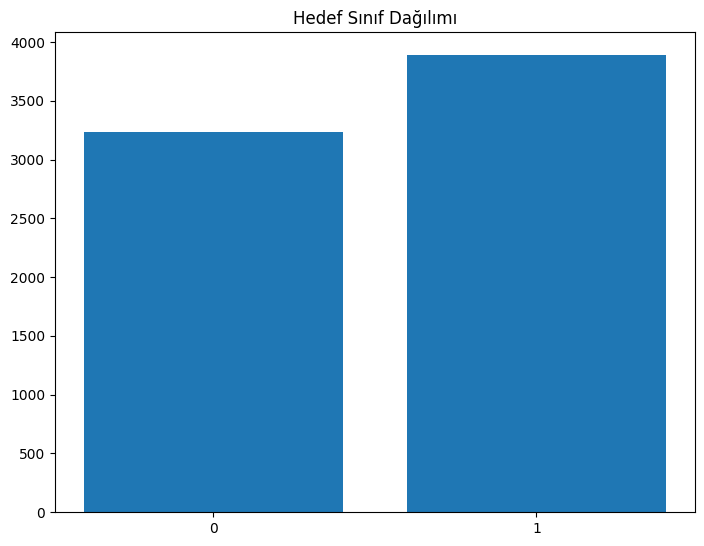

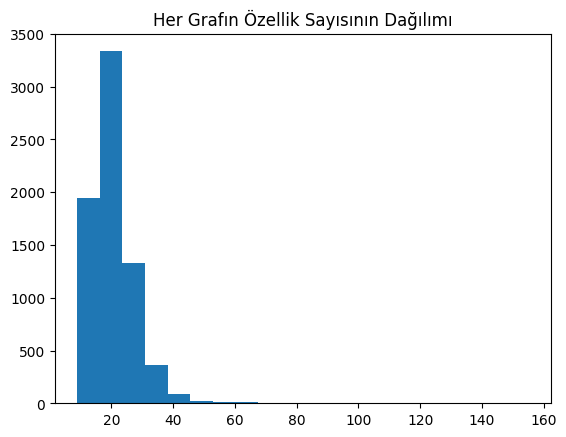

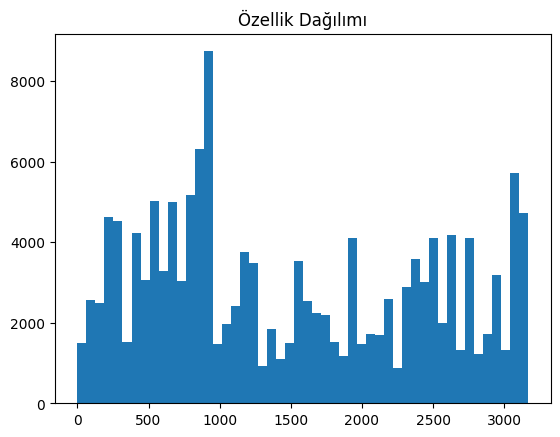


En çok tekrarlanan ilk 10 özellik:
Sayılar: [2598, 1535, 642, 2159, 507, 1588, 1047, 2648, 861, 800]
Tekrar Sayıları: [87, 178, 272, 18, 935, 52, 367, 6, 3242, 58]

En az tekrarlanan son 10 özellik:
Sayılar: [2942, 1773, 2809, 2368, 1073, 2495, 2608, 2269, 448, 3026]
Tekrar Sayıları: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
#json dosyasında ki özellikleri toplar.
feats=[]
feat_counts=[]
for i in range(len(data_raw)):
    feat_counts+=[len(data_raw[str(i)])]
    feats+=data_raw[str(i)]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks([0,1])
ax.bar([0,1],list(collections.Counter(target_data.mature).values()));


plt.title("Hedef Sınıf Dağılımı")
plt.show()
print("")
plt.hist(feat_counts,bins=20)
plt.title("Her Grafın Özellik Sayısının Dağılımı")
plt.show()
print("")
#
plt.hist(feats,bins=50)
plt.title("Özellik Dağılımı")
plt.show()

counter=collections.Counter(feats)
# En çok tekrar eden ilk 10 özelliği ve bunların tekrar sayılarını yazdır
print("\nEn çok tekrarlanan ilk 10 özellik:")
print("Sayılar:", list(counter.keys())[:10])  # İlk 10 özellik
print("Tekrar Sayıları:", list(counter.values())[:10])  # İlk 10'un frekansları

# En az tekrar eden son 10 özelliği ve bunların tekrar sayılarını yazdır
print("\nEn az tekrarlanan son 10 özellik:")
print("Sayılar:", list(counter.keys())[-10:])  # Son 10 özellik
print("Tekrar Sayıları:", list(counter.values())[-10:])  # Son 10'un frekansları





In [ ]:
G = nx.from_pandas_edgelist(edge_data,source='from',target='to')
print(f"\nNumber of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Is the graph directed? {G.is_directed()}")


Number of nodes: 7126
Number of edges: 35324
Is the graph directed? False


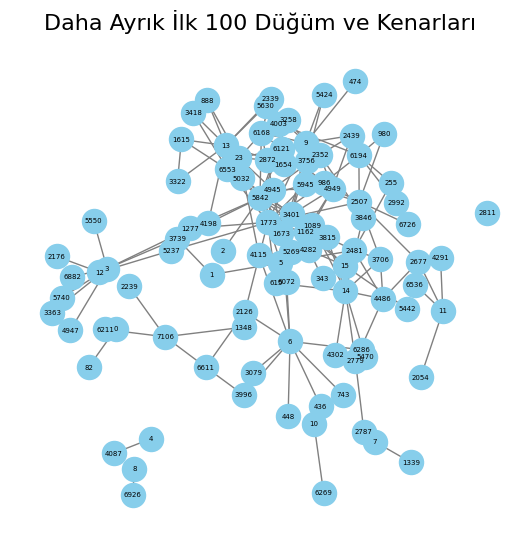

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# İlk 100 düğümü seç
first_100_nodes = list(G.nodes())[:100]

# Altgraf oluştur (ilk 100 düğüm ve bunlara bağlı kenarlar)
subgraph = G.subgraph(first_100_nodes).copy()

# Altgrafı çiz
plt.figure(figsize=(5, 5))  # Figür boyutunu büyüttük
pos = nx.spring_layout(subgraph, seed=1, k=0.3)  # 'k' parametresi ile ayrıklığı artırdık
nx.draw(
    subgraph,
    pos,
    with_labels=True,
    node_size=300,
    node_color='skyblue',
    font_size=5,
    font_color='black',
    edge_color='gray',
)

plt.title("Daha Ayrık İlk 100 Düğüm ve Kenarları", fontsize=16)
plt.show()


In [ ]:
#Grafikteki her düğüm için derece merkeziyetini hesaplar(Derece merkeziyeti, bir düğümün bağlandığı diğer düğümlerin sayısının toplam düğüm sayısına oranıdır.)
centrality = nx.degree_centrality(G)

#Merkeziyet değerlerini azalan sıraya göre sıralar. Sonrasında ilk ve son değerleri almak için.
centrality = sorted(centrality.items(), key=lambda item: -1*item[1])

#En merkezi düğümü ve merkeziyet değerini alır.(Derece merkeziyeti 0.00014035087719298245 ve 0.10105263157894737 büyük eşit olan)(ağırlıklarla ilgili daha detaylı bir analiz)
centrality[0], sum([1 for i in centrality if i[1] == 0.00014035087719298245]), sum([1 for i in centrality if i[1] >= 0.10105263157894737])

#7071 düğümüne bağlı gelen ve 1773 düğümünden çıkan tüm kenarların bilgilerini içerir.(Örnek olarak aldık)
edge_data[edge_data['to']==7071], edge_data[edge_data['from']==1773]



(       from    to
 35308  6972  7071,
        from    to
 14729  1773  5274
 14730  1773  5277
 14731  1773  6203
 14732  1773  4684
 14733  1773  3500
 ...     ...   ...
 15264  1773  1675
 15265  1773  2594
 15266  1773  7053
 15267  1773  3801
 15268  1773  4821
 
 [540 rows x 2 columns])

In [ ]:
import heapq
#İlk 10 düğüm ağırlığını sıralama
import networkx as nx
centrality_data = nx.degree_centrality(G)
centrality_items = list(centrality_data.items())

heapq.nlargest(10, centrality_items, key=lambda item: item[1])

[(1773, 0.10105263157894737),
 (4949, 0.09698245614035086),
 (3401, 0.06526315789473684),
 (6136, 0.053052631578947365),
 (166, 0.049403508771929824),
 (5842, 0.0471578947368421),
 (1924, 0.04435087719298245),
 (2732, 0.03901754385964912),
 (2447, 0.038175438596491224),
 (1103, 0.03564912280701754)]

In [ ]:
# En yüksek dereceye sahip düğümü bul
top_firs_nodes = sorted(centrality, key=lambda item: item[1], reverse=True)[:1] # Changed degree_centrality to centrality
top_end_nodes = sorted(centrality, key=lambda item: item[1], reverse=True)[-1:] # Changed degree_centrality to centrality
# Sonuçları yazdır
for node, centrality in top_firs_nodes:
    print(f"Düğüm {node}: Derece Merkeziyeti = {centrality}")
for node, centrality in top_end_nodes:
    print(f"Düğüm {node}: Derece Merkeziyeti = {centrality}")

Düğüm 1773: Derece Merkeziyeti = 0.10105263157894737
Düğüm 7071: Derece Merkeziyeti = 0.00014035087719298245


In [ ]:
import torch

# Check CUDA availability and print device name if available
if torch.cuda.is_available():
    print("CUDA is available!")
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

# ... (Rest of your code) ...


CUDA is available!
Device name: Tesla T4


In [ ]:
import tensorflow as tf

# TensorFlow GPU kontrolü
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1



training samples 4276
validation samples 1425
test samples 1425

Epoch 0/1000
      Accuracy        Precision       Recall          F1             
-----------------------------------------------------------------
Train  0.4991          0.5549          0.5466          0.5508         
Val    0.5053          0.5259          0.5590          0.5419         
Test   0.4842          0.5031          0.5405          0.5212         
-----------------------------------------------------------------
Train Loss:    0.7045    
Val Loss:      0.6926    
-----------------------------------------------------------------
Epoch 10/1000
      Accuracy        Precision       Recall          F1             
-----------------------------------------------------------------
Train  0.6473          0.6927          0.6690          0.6806         
Val    0.6575          0.6711          0.6783          0.6747         
Test   0.6533          0.6636          0.6743          0.6689         
-------------------------

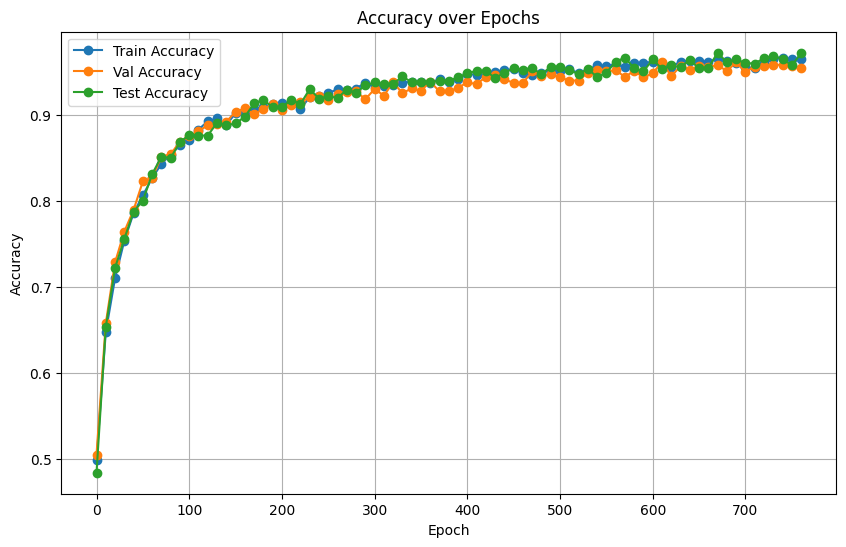

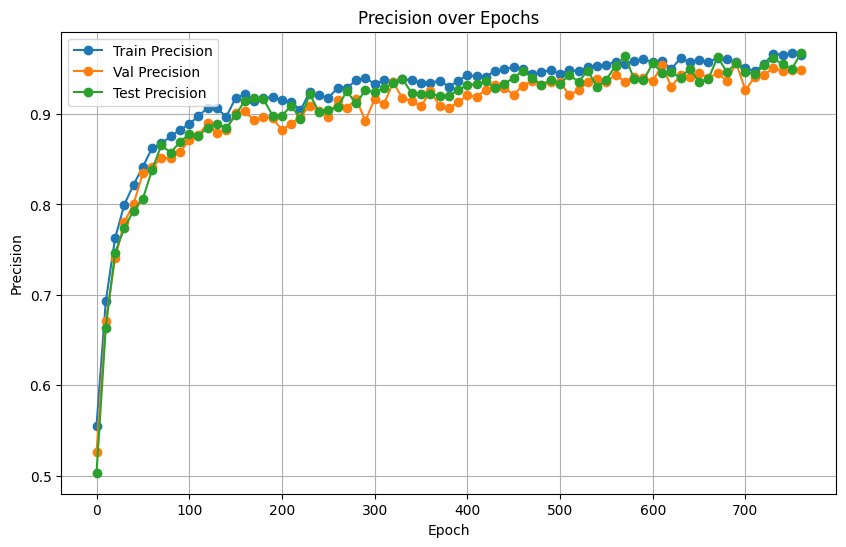

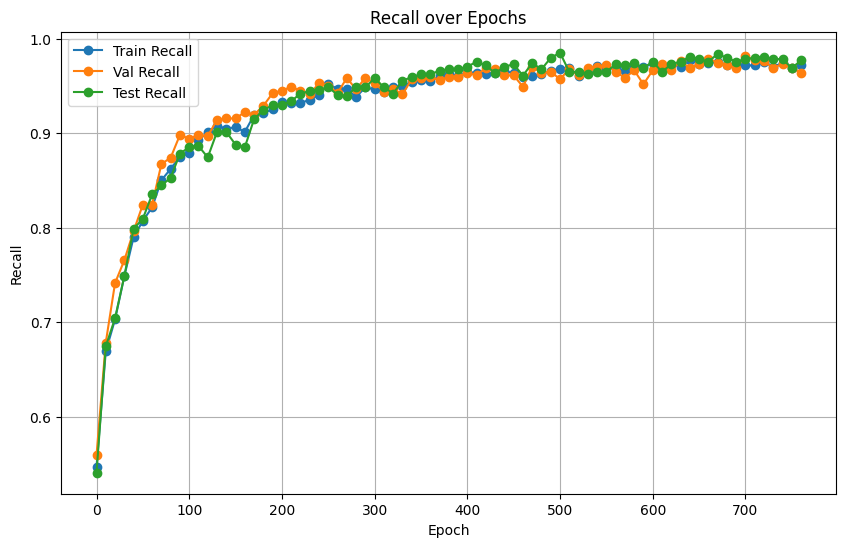

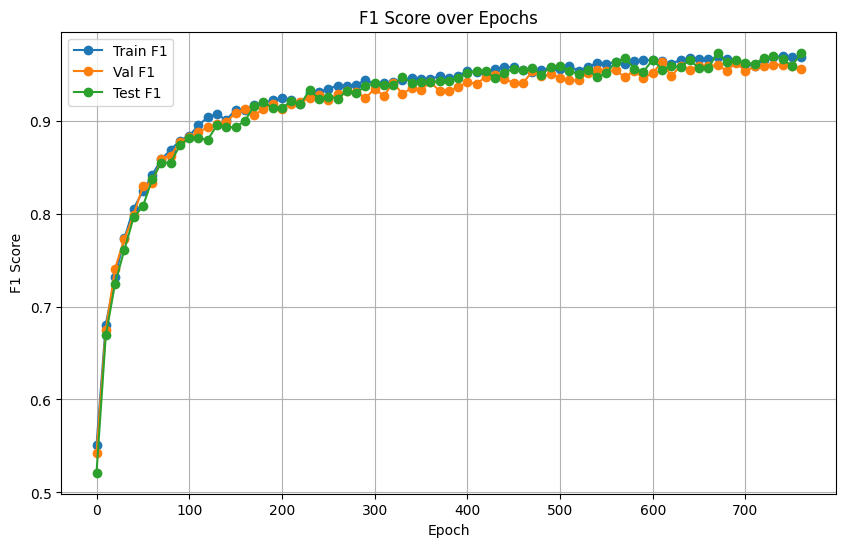

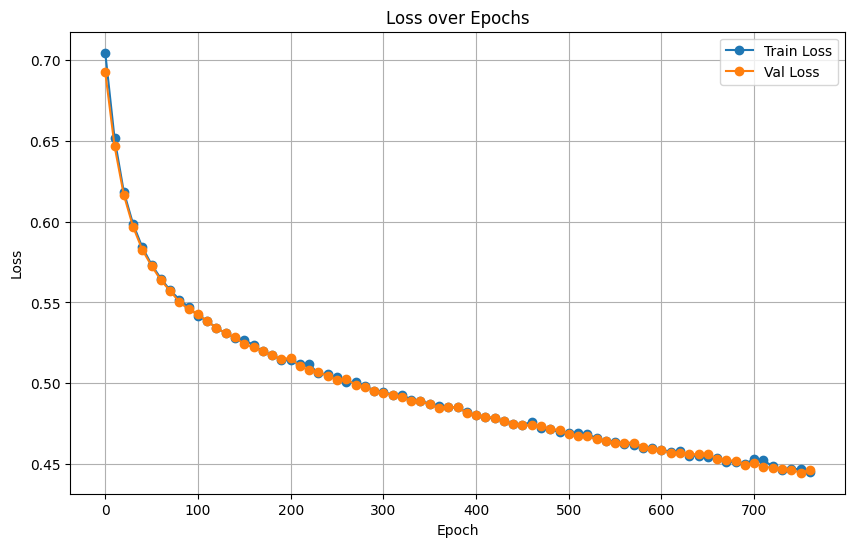

In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
!pip install -q torch torchvision torchaudio
!pip install -q torch-geometric
!pip install -q torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q matplotlib numpy scikit-learn

# Gerekli kütüphaneler import ediliyor
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt  # Grafikler çizmek için gerekli
from sklearn.metrics import precision_score, recall_score, f1_score  # Performans metrikleri için gerekli
from torch_geometric.data import Data  # Grafik verisi oluşturmak için
from torch_geometric.transforms import RandomNodeSplit as masking  # Eğitim, doğrulama ve test setlerini oluşturmak için
from torch_geometric.nn import GCNConv  # Grafik Sinir Ağlarının temel katmanı
import torch.optim as optim


# Veriyi kodlamak için bir fonksiyon
def encode_data():
    nodes_included = len(data_raw)

    feats = []
    for i in range(nodes_included):
        feats.extend(data_raw[str(i)])
    max_feat = max(feats)

    data_encoded = {}

    for i in range(nodes_included):
        one_hot_feat = np.zeros(max_feat + 1)
        this_feat = data_raw[str(i)]
        one_hot_feat[this_feat] = 1
        data_encoded[str(i)] = list(one_hot_feat)

    return data_encoded  # Kodlanmış veriyi döndürüyoruz


# Grafik verisi oluşturmak için bir fonksiyon
def construct_graph(data_encoded):
    node_features_list = list(data_encoded.values())
    node_features = torch.tensor(node_features_list, dtype=torch.float)
    node_labels = torch.tensor(target_data['mature'], dtype=torch.long)
    edges_list = list(zip(edge_data['from'], edge_data['to']))
    edge_index01 = torch.tensor(edges_list, dtype=torch.long).T

    # Kenarları iki yönlü hale getiriyoruz
    edge_index02 = torch.zeros(edge_index01.shape, dtype=torch.long)
    edge_index02[0, :] = edge_index01[1, :]
    edge_index02[1, :] = edge_index01[0, :]
    edge_index0 = torch.cat((edge_index01, edge_index02), axis=1)

    # Grafik nesnesi oluşturuluyor
    g = Data(x=node_features, y=node_labels, edge_index=edge_index0)

    return g


# Veriyi kodluyor ve grafik oluşturuyoruz
data_encoded = encode_data()
g = construct_graph(data_encoded)

# Grafik verisini eğitim, doğrulama ve test setlerine bölüyoruz
msk = masking(split="train_rest", num_splits=1, num_val=0.2, num_test=0.2)
g = msk(g)



#Örnekleri yazdır
print()
print("training samples", torch.sum(g.train_mask).item())
print("validation samples", torch.sum(g.val_mask).item())
print("test samples", torch.sum(g.test_mask).item())
print()

# Grafik Sinir Ağı (GCN) modeli tanımlıyoruz
class SocialGNN(torch.nn.Module):
    def __init__(self, num_of_feat, f, dropout_rate=0.2):
        super(SocialGNN, self).__init__()
        # GCN katmanlarını tanımla
        self.conv1 = GCNConv(num_of_feat, f)
        self.bn1 = torch.nn.BatchNorm1d(f)
        self.conv2 = GCNConv(f, 2)
        self.bn2 = torch.nn.BatchNorm1d(2)

        # Dropout oranını belirle
        self.dropout_rate = dropout_rate

    def forward(self, data):
        # Giriş verisini al (data.x özellikler ve data.edge_index kenar indeksini içerir)
        x = data.x.float()  # Özellikleri float formatına dönüştür
        edge_index = data.edge_index  # Kenar indeksini al

        # İlk GCN katmanını uygula ve Batch Normalization ile normalleştir
        x = self.conv1(x, edge_index)  # İlk katman
        x = self.bn1(x)  # Batch Normalization
        x = F.relu(x)  # ReLU aktivasyonu

        # Dropout uygulayarak aşırı uyumu engelle
        x = F.dropout(x, p=self.dropout_rate, training=self.training)  # Dropout, eğitim aşamasında etkin

        # İkinci GCN katmanını uygula ve Batch Normalization ile normalleştir
        x = self.conv2(x, edge_index)  # İkinci katman
        x = self.bn2(x)  # Batch Normalization
        x = torch.sigmoid(x)  # Sigmoid aktivasyonu (ikili sınıflama için)

        return x  # Çıkışı döndür (örneğin, sınıf olasılıkları)

# Maskelenmiş kayıp fonksiyonu
def masked_loss(predictions, labels, mask):
    mask = mask.float()
    mask = mask / torch.mean(mask)  # Maskeyi normalleştiriyoruz
    loss = criterion(predictions, labels)  # Kayıp hesaplanıyor
    loss = loss * mask  # Maskeyi kayıba uyguluyoruz
    loss = torch.mean(loss)  # Ortalama kayıp
    return loss

# Maskelenmiş doğruluk fonksiyonu
def masked_accuracy(predictions, labels, mask):
    mask = mask.float()
    mask /= torch.mean(mask)
    accuracy = (torch.argmax(predictions, axis=1) == labels).long()
    accuracy = mask * accuracy
    accuracy = torch.mean(accuracy)
    return accuracy

# Modeli eğitmek için fonksiyon
def train_social(net, data, epochs=1, lr=0.01, patience=10):
    # Adam optimizasyon algoritması ile model parametrelerini optimize etmek için optimizer oluşturuluyor.
    # 'net.parameters()' modelin tüm parametrelerini alır, 'lr' öğrenme oranını belirtir.
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    # En iyi doğruluk değeri başta sıfır olarak belirleniyor, modelin ilerleyen adımlarda bu değer güncellenebilir.
    best_accuracy = 0.0
    best_val_loss = float('inf')  # Başlangıçta en iyi doğrulama kaybı sonsuz kabul edilir.
    epochs_without_improvement = 0  # İyileşme olmadan geçen epoch sayısı

    # Accuracies List
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []
    # Precisions List
    train_precisions = []
    val_precisions = []
    test_precisions = []
    # Recalls List
    train_recalls = []
    val_recalls = []
    test_recalls = []
    # F1 List
    train_f1s = []
    val_f1s = []
    test_f1s = []
    # Losses List
    train_losses = []
    val_losses = []

    #modelin her eğitim döngüsünde verileri alıp çıktıları üretmek, ardından geriye yayılım (backpropagation) ile modelin ağırlıklarını güncelleyerek hatalarını azaltmaktır.
    for ep in range(epochs + 1):
        optimizer.zero_grad()
        out = net(data)

        # Eğitim verileri için kayıp (loss) değeri hesaplanır.
        train_loss = masked_loss(predictions=out, labels=data.y, mask=data.train_mask)
        # Hesaplanan kaybın türevleri, geri yayılım (backpropagation) ile modelin ağırlıklarına uygulanır.
        train_loss.backward()
        # Optimize edici (optimizer) modelin ağırlıklarını, geri yayılımda hesaplanan türevleri kullanarak günceller.
        optimizer.step()
        # Modelin çıktılarından (out) her düğüm için en olası sınıf etiketini al (maksimum olasılık değeri olan sınıfın indeksi)
        predictions = torch.argmax(out, dim=1)


        # Precision, Recall, ve F1 Score Train için hesaplandı
        train_accuracy = masked_accuracy(predictions=out, labels=data.y, mask=data.train_mask)
        train_precision = precision_score(data.y[data.train_mask].cpu(), predictions[data.train_mask].cpu(), average='binary')
        train_recall = recall_score(data.y[data.train_mask].cpu(), predictions[data.train_mask].cpu(), average='binary')
        train_f1 = f1_score(data.y[data.train_mask].cpu(), predictions[data.train_mask].cpu(), average='binary')

        # Precision, Recall, ve F1 Score Validation için hesaplandı
        val_accuracy = masked_accuracy(predictions=out, labels=data.y, mask=data.val_mask)
        val_precision = precision_score(data.y[data.val_mask].cpu(), predictions[data.val_mask].cpu(), average='binary')
        val_recall = recall_score(data.y[data.val_mask].cpu(), predictions[data.val_mask].cpu(), average='binary')
        val_f1 = f1_score(data.y[data.val_mask].cpu(), predictions[data.val_mask].cpu(), average='binary')

        # Precision, Recall, ve F1 Score Test için hesaplandı
        test_accuracy = masked_accuracy(predictions=out, labels=data.y, mask=data.test_mask)
        test_precision = precision_score(data.y[data.test_mask].cpu(), predictions[data.test_mask].cpu(), average='binary')
        test_recall = recall_score(data.y[data.test_mask].cpu(), predictions[data.test_mask].cpu(), average='binary')
        test_f1 = f1_score(data.y[data.test_mask].cpu(), predictions[data.test_mask].cpu(), average='binary')

        #Validation ve test loss hesaplandı
        with torch.no_grad():
            val_out = net(data)
            val_loss = masked_loss(predictions=val_out, labels=data.y, mask=data.val_mask)
            test_loss = masked_loss(predictions=val_out, labels=data.y, mask=data.test_mask)

        # Erken durdurma: Validation kaybı iyileşmediğinde eğitim durdurulacak
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_without_improvement = 0  # Kaybın iyileştiği için sayacı sıfırla
        else:
            epochs_without_improvement += 1

        # Eğitim durduruluyor (early stopping)
        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {ep}. No improvement in validation loss.")
            break

        # Metrikler eklendi
        train_accuracies.append(train_accuracy.item())
        val_accuracies.append(val_accuracy.item())
        test_accuracies.append(test_accuracy.item())

        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        test_precisions.append(test_precision)

        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        test_recalls.append(test_recall)

        train_f1s.append(train_f1)
        val_f1s.append(val_f1)
        test_f1s.append(test_f1)

        # Eğitin ve doğrulama kayıp değeri
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())


        # Sonuçlar Yazdırılıyor
        if ep % 10 == 0 or ep == epochs:
            print(f"Epoch {ep}/{epochs}")
            print(f"{'':<5} {'Accuracy':<15} {'Precision':<15} {'Recall':<15} {'F1':<15}")
            print(f"{'-' * 65}")
            print(f"Train  {train_accuracy:<15.4f} {train_precision:<15.4f} {train_recall:<15.4f} {train_f1:<15.4f}")
            print(f"Val    {val_accuracy:<15.4f} {val_precision:<15.4f} {val_recall:<15.4f} {val_f1:<15.4f}")
            print(f"Test   {test_accuracy:<15.4f} {test_precision:<15.4f} {test_recall:<15.4f} {test_f1:<15.4f}")
            print("-" * 65)
            print(f"Train Loss:    {train_loss.item():<10.4f}")
            print(f"Val Loss:      {val_loss.item():<10.4f}")
            print("-" * 65)
    actual_epochs = len(train_accuracies)
    epochs_range = range(0, actual_epochs, 10)

    # Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_accuracies[::10], label='Train Accuracy', marker='o')
    plt.plot(epochs_range, val_accuracies[::10], label='Val Accuracy', marker='o')
    plt.plot(epochs_range, test_accuracies[::10], label='Test Accuracy', marker='o')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Precision
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_precisions[::10], label='Train Precision', marker='o')
    plt.plot(epochs_range, val_precisions[::10], label='Val Precision', marker='o')
    plt.plot(epochs_range, test_precisions[::10], label='Test Precision', marker='o')
    plt.title('Precision over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Recall
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_recalls[::10], label='Train Recall', marker='o')
    plt.plot(epochs_range, val_recalls[::10], label='Val Recall', marker='o')
    plt.plot(epochs_range, test_recalls[::10], label='Test Recall', marker='o')
    plt.title('Recall over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()
    plt.grid(True)
    plt.show()

    # F1 score
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_f1s[::10], label='Train F1', marker='o')
    plt.plot(epochs_range, val_f1s[::10], label='Val F1', marker='o')
    plt.plot(epochs_range, test_f1s[::10], label='Test F1', marker='o')
    plt.title('F1 Score over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_losses[::10], label='Train Loss', marker='o')
    plt.plot(epochs_range, val_losses[::10], label='Val Loss', marker='o')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Modeli oluşturuyoruz
num_of_feat = g.num_node_features
net = SocialGNN(num_of_feat=num_of_feat, f=64)
optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=1e-5)  # weight_decay L2 regularizasyonu

#Kayıp Fonksiyon
criterion = nn.CrossEntropyLoss()

# Modeli eğitiyoruz
train_social(net, g, epochs=1000, lr=0.001)

In [ ]:
# Modelin tahminlerini elde ediyoruz
model_output = net(g)  # Modelin çıktısını alıyoruz
predictions = torch.argmax(model_output, dim=1)  # Her düğüm için tahmin edilen sınıfı alıyoruz

# Rastgele 10 örnek seçiyoruz
random_indices = torch.randint(0, len(g.y), (10,))  # 0 ile len(g.y) arasında rastgele 10 indeks seçiyoruz

# Tahmin edilen ve gerçek 'mature' değerlerini alıyoruz
random_predictions = predictions[random_indices]  # Tahmin edilen değerler
random_real_values = g.y[random_indices]  # Gerçek değerler

# Rastgele seçilen 10 örneği ve modelin tahminlerini yazdırıyoruz
print(f"{'Index':<10} {'Gerçek':<10} {'Tahmin':<10}")
print("-" * 30)  # Tablo başlıklarının altına çizgi ekliyoruz

for idx, pred, real in zip(random_indices, random_predictions, random_real_values):
    maturity_pred = "Yetişkin" if pred.item() == 1 else "Genç"
    maturity_real = "Yetişkin" if real.item() == 1 else "Genç"
    print(f"{idx.item():<10} {maturity_real:<10} {maturity_pred:<10}")




Index      Gerçek     Tahmin    
------------------------------
1958       Yetişkin   Yetişkin  
2687       Yetişkin   Yetişkin  
5255       Genç       Genç      
1559       Genç       Genç      
760        Yetişkin   Yetişkin  
7006       Yetişkin   Yetişkin  
4619       Yetişkin   Yetişkin  
1457       Yetişkin   Yetişkin  
1043       Yetişkin   Yetişkin  
7032       Yetişkin   Yetişkin  


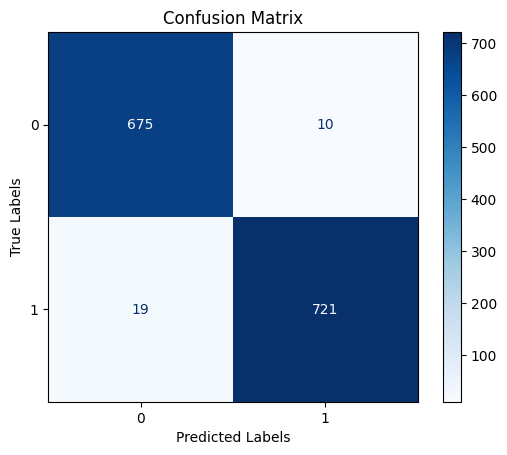

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Modeli değerlendirme moduna al
model=net
model.eval()

# Modelin çıktısını almak için test verisi üzerinden geçiyoruz
with torch.no_grad():
    # Modelin tahminlerini al
    logits = model(g)  # g burada eğitimli model üzerinden tahminler için kullanılır
    y_pred = logits[g.test_mask].argmax(dim=1)  # Test verilerinin tahminlerini al

# Gerçek etiketleri ve tahminleri numpy dizilerine dönüştür
y_true = target_data['mature'].values[g.test_mask.cpu().numpy()]  # Gerçek etiketler (sadece test maskesi için)
y_pred = y_pred.cpu().numpy()  # Tahmin edilen etiketler

# Confusion Matrix oluştur ve görselleştir
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()


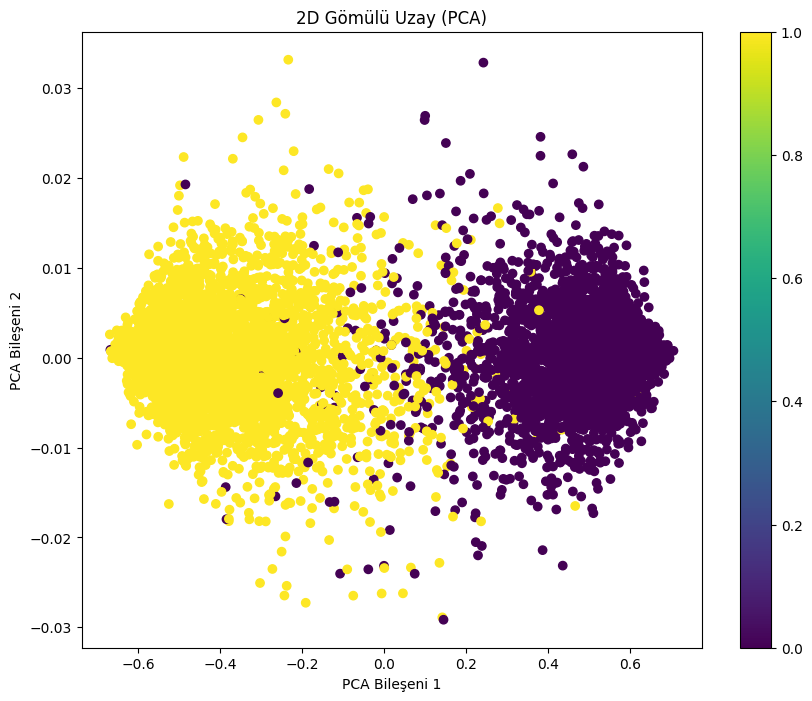

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modelinizi değerlendirme moduna alıyoruz
model.eval()

# Test verisi üzerinden özellikleri çıkarıyoruz
with torch.no_grad():
    # Verilerinizi doğru şekilde modele besleyin
    # Bu örnekte, 'data' sosyal grafiğinizin özellik matrisi ve kenar bilgilerini içeriyor
    output = model(g)

# İkinci katmandan çıkan özellikler (sonuçları alıyoruz)
# 'output' modelin tahmin ettiği sınıflar olacaktır
# Ancak biz sadece gömülü uzayı görmek istediğimiz için 'output' özelliğini alıyoruz
embeddings = output.detach().cpu().numpy()  # NumPy'ye çeviriyoruz

# PCA veya t-SNE ile 2D uzaya indirgeme
# Burada PCA kullanıyoruz, ancak TSNE de tercih edebilirsiniz
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# 2D gömülü uzayı görselleştirme
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=g.y, cmap='viridis')
plt.colorbar()  # Etiket renklerine göre renk çubuğu
plt.title('2D Gömülü Uzay (PCA)')
plt.xlabel('PCA Bileşeni 1')
plt.ylabel('PCA Bileşeni 2')
plt.show()